In this post we will use [Case Western Reserve University Bearnig](https://csegroups.case.edu/bearingdatacenter/pages/welcome-case-western-reserve-university-bearing-data-center-website) data set for our multiclass classification problem. 

## Description of dataset

A bearing has four major parts: inner race, outer race, rolling element and cage. Fault can occur in any of these components. The CWRU data set contains bearing data consisting of inner race fault, outer race fault and ball defect. A baseline (normal) bearing data with no faults is also available. Some data are collected at a sampling frequency of 12 kHz and some other are collected at 48 kHz. In this study, we will only consider data acquired at 48 kHz sampling frequency. The faults have varying fault depths (0.007 inch, 0.014 inch, 0.021 inch). There is also load variation in motor (No load, 1 hp, 2 hp, 3hp). For this study, we will consider all the data with 1 hp external load.

There are 10 classes for this external load (1 hp). The classes are:


* C1  : Ball defect (0.007 inch)
* C2  : Ball defect (0.014 inch)
* C3  : Ball defect (0.021 inch)
* C4  : Inner race fault (0.007 inch)
* C5  : Inner race fault (0.014 inch)
* C6  : Inner race fault (0.021 inch)
* C7  : Normal
* C8  : Outer race fault (0.007 inch, data collected from 6 O'clock position)
* C9  : Outer race fault (0.014 inch, 6 O'clock)
* C10 : Outer race fault (0.021 inch, 6 O'clock)

## Solution Approach

Our task is to classify these 10 types of fault given time data. There are many approaches to solve this. We will take one known as 'Shallow Approach'. In the age of deep learning these methods are shallow for several reasons. These methods require hand crafted features to be designed and fed into the learning algorithm. Another name for shallow approach is feature based approach. We will use support vector machine (SVM) to do the classification. We will apply other techniques including deep learning techniques in later posts. 

We have used time domain features as input to SVM. First data for each fault type are collected and segmented into smaller parts. In our case, one segment for each fault type contains 2048 data points. Then time domain features for each segment are calculated and assembled in a feature matrix. There are 230 segments for each fault and we have taken 9 time domain features. The time domain features are maximum, minimum, mean value, standard deviation, root mean square value (RMS), skewness, kurtosis, crest factor, and form factor. Thus our feature matrix is of size $(2300 \times 9)$. One column containing fault type is also added to the feature matrix. Thus final feature matrix is of size $(2300 \times 10)$. 

Before applying SVM, the data are first separated into a training set and a test set. The test set contains 75 rows of fault matrix chosen for each fault type. Thus its size is $(750 \times 10)$. The rest are taken as training set. 

SVM is applied to training set data and best parameters are chosen by cross validation. The best parameters are then applied to test set data to predict final classification result. We will plot the confusion matrix. 

In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

### How to get data?
Readers can download the `.csv` file used in this notebook from [here](https://github.com/biswajitsahoo1111/cbm_codes_open/blob/master/notebooks/data/feature_time_48k_2048_load_1.csv). Another convenient way is to [download the whole repository](https://codeload.github.com/biswajitsahoo1111/cbm_codes_open/legacy.zip/master) and run the downloaded notebooks.

In [39]:
data_time = pd.read_csv("./data/feature_time_48k_2048_load_1.csv")

In [40]:
#data_time.describe()
data_time.head()

,max,min,mean,sd,rms,skewness,kurtosis,crest,form,fault
0,0.35986,-0.41890,0.017840,0.122746,0.124006,-0.118571,-0.042219,2.901946,6.950855,Ball_007_1
1,0.46772,-0.36111,0.022255,0.132488,0.134312,0.174699,-0.081548,3.482334,6.035202,Ball_007_1
2,0.46855,-0.43809,0.020470,0.149651,0.151008,0.040339,-0.274069,3.102819,7.376926,Ball_007_1
3,0.58475,-0.54303,0.020960,0.157067,0.158422,-0.023266,0.134692,3.691097,7.558387,Ball_007_1
4,0.44685,-0.57891,0.022167,0.138189,0.139922,-0.081534,0.402783,3.193561,6.312085,Ball_007_1


In [41]:
#data_time['fault'] = pd.Categorical(data_time['fault'])

In [42]:
# data_time.fault.unique()
data_time['fault'].value_counts()

IR_007_1      230
IR_021_1      230
OR_014_6_1    230
OR_021_6_1    230
Normal_1      230
Ball_014_1    230
IR_014_1      230
Ball_007_1    230
OR_007_6_1    230
Ball_021_1    230
Name: fault, dtype: int64

There are 10 classes for this external load (1 hp). The classes are:
*   **IR_007_1** # C1  : Ball defect (0.007 inch)
*   **IR_014_1** # C2  : Ball defect (0.014 inch)
*   **IR_021_1** # C3  : Ball defect (0.021 inch)
*   **IR_007_1** # C4  : Inner race fault (0.007 inch)
*   **IR_014_1** # C5  : Inner race fault (0.014 inch)
*   **IR_021_1** # C6  : Inner race fault (0.021 inch)
*   **Normal_1** # C7  : Normal
* **OR_007_6_1** # C8  : Outer race fault (0.007 inch, data collected from 6 O'clock position)
* **OR_014_6_1** # C9  : Outer race fault (0.014 inch, 6 O'clock)
* **OR_021_6_1** # C10 : Outer race fault (0.021 inch, 6 O'clock)

In [63]:
data_time[data_time['fault'] == "Ball_007_1"].describe()

,max,min,mean,sd,rms,skewness,kurtosis,crest,form
count,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000
mean,0.469357,-0.424630,0.019104,0.139587,0.140874,0.011312,-0.008581,3.327671,7.459539
std,0.065202,0.060713,0.002126,0.010017,0.009965,0.069508,0.283696,0.353823,0.945067
min,0.312710,-0.616040,0.012815,0.115848,0.117736,-0.159351,-0.626142,2.537506,5.377638
25%,0.425525,-0.456135,0.017842,0.133509,0.134660,-0.043265,-0.222445,3.088583,6.818491
50%,0.458120,-0.414830,0.018891,0.138749,0.139884,0.007629,-0.042934,3.284040,7.332604
75%,0.502350,-0.379103,0.020299,0.146015,0.147091,0.064074,0.147930,3.530102,8.062528
max,0.675500,-0.318970,0.023994,0.171796,0.173001,0.174699,1.329710,4.625105,11.313216


Divide the into training and test set.

In [43]:
train_data, test_data = train_test_split(data_time, test_size = 750, stratify = data_time['fault'],
                                         random_state = 1234)
test_data['fault'].value_counts()

IR_007_1      75
Normal_1      75
Ball_014_1    75
IR_014_1      75
IR_021_1      75
Ball_007_1    75
OR_007_6_1    75
OR_014_6_1    75
OR_021_6_1    75
Ball_021_1    75
Name: fault, dtype: int64

In [44]:
data_time.shape

(2300, 10)

Before applying SVM, it is always a better idea to scale the data.

In [45]:
scaler = StandardScaler()
train_data_scaled = scaler.fit_transform(train_data.iloc[:,:-1])

# pd.DataFrame(train_data).describe()
pd.DataFrame(train_data_scaled).describe()

,0,1,2,3,4,5,6,7,8
count,1.550000e+03,1.550000e+03,1.550000e+03,1.550000e+03,1.550000e+03,1.550000e+03,1.550000e+03,1.550000e+03,1.550000e+03
mean,1.219097e-16,9.963356e-17,9.030411e-17,3.839223e-17,-7.083939e-17,-5.813450e-17,-3.724619e-17,4.862777e-16,-2.198958e-17
std,1.000323e+00,1.000323e+00,1.000323e+00,1.000323e+00,1.000323e+00,1.000323e+00,1.000323e+00,1.000323e+00,1.000323e+00
min,-8.877055e-01,-2.951564e+00,-1.935376e+00,-9.258092e-01,-9.231913e-01,-5.951422e+00,-7.874742e-01,-1.481163e+00,-7.775653e-01
25%,-7.088474e-01,-3.753614e-01,-6.908705e-01,-6.755048e-01,-6.760659e-01,-3.678525e-01,-6.073122e-01,-8.064817e-01,-6.475107e-01
50%,-4.958143e-01,5.113022e-01,-3.141526e-01,-5.055027e-01,-5.038108e-01,2.140248e-01,-4.182916e-01,-2.135605e-01,-4.548003e-01
75%,4.477234e-01,7.003484e-01,4.560105e-01,7.015641e-01,7.003255e-01,5.823124e-01,2.860828e-01,5.648177e-01,4.360429e-01
max,3.297226e+00,8.671141e-01,3.503861e+00,2.980548e+00,2.981995e+00,4.906756e+00,6.349353e+00,4.049712e+00,9.629399e+00


In [46]:
# Average value of each column in train_data
#   - To be used for test_data normalization
scaler.mean_

array([ 1.58219286e+00, -1.55271056e+00,  1.57490331e-02,  3.42933667e-01,
        3.43624109e-01, -4.02053997e-02,  2.63759871e+00,  4.16961660e+00,
        2.66656364e+01])

In [47]:
# Standard deviation of each column in train_data
#   - To be used for test_data normalization
np.sqrt(scaler.var_)

array([1.59033918e+00, 1.60589082e+00, 6.46050379e-03, 3.06535375e-01,
       3.06065962e-01, 1.74519408e-01, 4.37016635e+00, 1.14871378e+00,
       2.98125524e+01])

In [48]:
test_data_scaled = (test_data.iloc[:,:-1].values - scaler.mean_)/np.sqrt(scaler.var_)
pd.DataFrame(test_data_scaled).describe()

,0,1,2,3,4,5,6,7,8
count,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000
mean,-0.013718,0.003277,-0.018151,-0.013327,-0.013375,-0.035946,0.018838,0.009379,-0.012433
std,0.976752,0.993896,1.003708,0.987301,0.987315,1.105931,1.028360,0.998996,0.936491
min,-0.895968,-2.754539,-1.590184,-0.922087,-0.922953,-6.014935,-0.759377,-1.515700,-0.772309
25%,-0.706453,-0.429163,-0.720867,-0.677965,-0.678545,-0.355683,-0.606352,-0.762882,-0.641796
50%,-0.494044,0.503185,-0.303458,-0.492809,-0.490457,0.224657,-0.415267,-0.219297,-0.452940
75%,0.394936,0.704214,0.401811,0.669274,0.667916,0.576534,0.294171,0.547845,0.447909
max,3.008545,0.861398,3.003970,2.885914,2.887282,6.301407,5.007205,3.784107,3.531440


We will check a grid of parameters to find the best one. For each parameter combination, 10 fold cross-validation is performed.

In [49]:
parameters = {"C":[1, 10, 50, 100, 300, 500],
             'gamma':[0.01, 0.05, 0.1, 0.5, 1, 5],
             'kernel':["rbf"]}
parameters

{'C': [1, 10, 50, 100, 300, 500],
 'gamma': [0.01, 0.05, 0.1, 0.5, 1, 5],
 'kernel': ['rbf']}

In [50]:
tuned_svm_clf = GridSearchCV(SVC(),parameters,n_jobs = -1, cv= 10)

In [51]:
# Here we run a grid search over SVM on training data for every set of parameters,
#   and determine the best combination of them
tuned_svm_clf.fit(train_data_scaled, train_data['fault'])

GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1, 10, 50, 100, 300, 500],
                         'gamma': [0.01, 0.05, 0.1, 0.5, 1, 5],
                         'kernel': ['rbf']})

In [52]:
tuned_svm_clf.best_params_

{'C': 50, 'gamma': 0.05, 'kernel': 'rbf'}

In [53]:
tuned_svm_clf.best_score_

0.9606451612903226

Now we will used the best model to find test accuracy.

In [54]:
best_clf = tuned_svm_clf.best_estimator_
best_clf

SVC(C=50, gamma=0.05)

In [59]:
# Use the tunned SVM model to compute the predictions
train_predictions = best_clf.predict(train_data_scaled)
test_predictions = best_clf.predict(test_data_scaled)
train_predictions

array(['IR_021_1', 'OR_014_6_1', 'Ball_021_1', ..., 'IR_014_1',
       'Normal_1', 'Ball_021_1'], dtype=object)

In [65]:
test_predictions

array(['OR_007_6_1', 'IR_014_1', 'OR_014_6_1', 'OR_021_6_1', 'OR_007_6_1',
       'Normal_1', 'IR_021_1', 'Ball_014_1', 'IR_021_1', 'Normal_1',
       'OR_014_6_1', 'Ball_007_1', 'Ball_021_1', 'IR_021_1', 'Normal_1',
       'IR_014_1', 'Ball_021_1', 'Ball_021_1', 'OR_021_6_1', 'OR_007_6_1',
       'IR_007_1', 'OR_007_6_1', 'Ball_007_1', 'Normal_1', 'Normal_1',
       'IR_014_1', 'OR_021_6_1', 'OR_007_6_1', 'OR_014_6_1', 'IR_014_1',
       'Normal_1', 'Ball_014_1', 'Ball_007_1', 'Ball_021_1', 'IR_021_1',
       'OR_014_6_1', 'IR_021_1', 'Ball_021_1', 'Ball_014_1', 'OR_014_6_1',
       'OR_021_6_1', 'OR_014_6_1', 'Ball_007_1', 'IR_014_1', 'Normal_1',
       'Normal_1', 'Ball_007_1', 'OR_014_6_1', 'Ball_021_1', 'IR_021_1',
       'OR_007_6_1', 'IR_007_1', 'IR_007_1', 'IR_007_1', 'Normal_1',
       'IR_021_1', 'IR_021_1', 'Ball_007_1', 'Ball_007_1', 'Normal_1',
       'OR_014_6_1', 'Ball_021_1', 'OR_021_6_1', 'OR_007_6_1',
       'Ball_014_1', 'IR_007_1', 'OR_007_6_1', 'Ball_014_1', 'IR_00

In [66]:
train_confu_matrix = confusion_matrix(train_data['fault'], train_predictions)
test_confu_matrix = confusion_matrix(test_data['fault'], test_predictions)

Train confusion matrix.

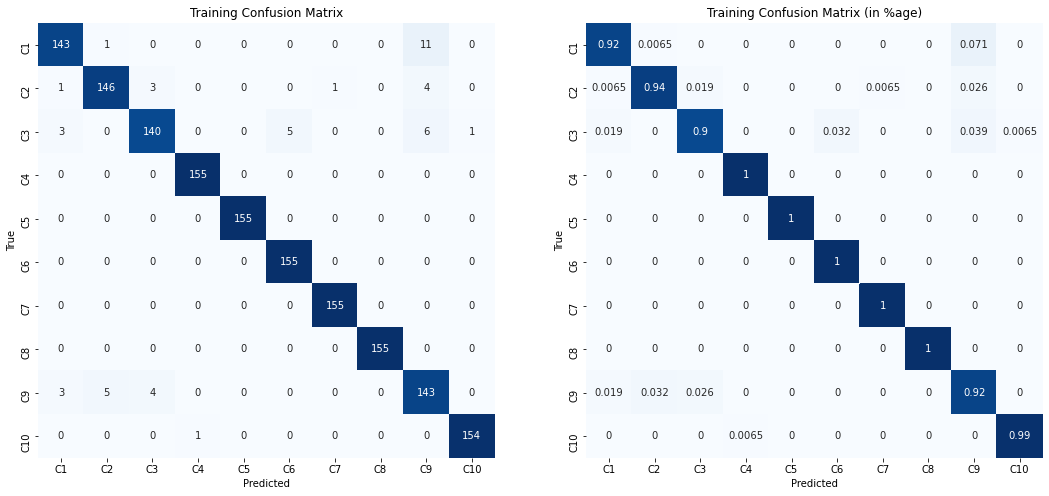

In [67]:
fault_type = ['C1','C2','C3','C4','C5','C6','C7','C8','C9','C10']
plt.figure(1,figsize=(18,8))
plt.subplot(121)
sns.heatmap(train_confu_matrix, annot= True,fmt = "d",
xticklabels=fault_type, yticklabels=fault_type, cmap = "Blues", cbar = False)
plt.title('Training Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.subplot(122)
sns.heatmap(train_confu_matrix/155, annot= True,
xticklabels=fault_type, yticklabels=fault_type, cmap = "Blues", cbar = False)
plt.title('Training Confusion Matrix (in %age)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Test confusion matrix.

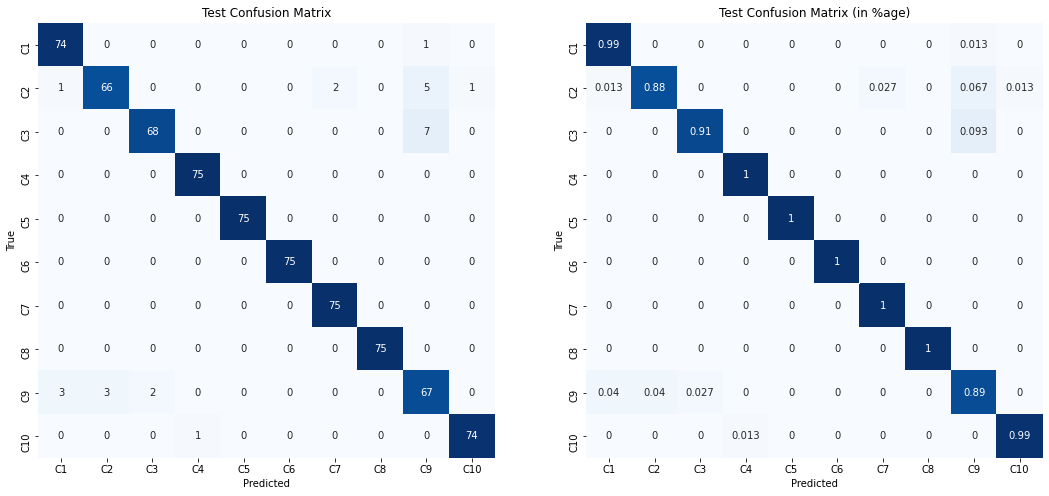

In [68]:
plt.figure(2,figsize=(18,8))
plt.subplot(121)
sns.heatmap(test_confu_matrix, annot = True,
xticklabels=fault_type, yticklabels=fault_type, cmap = "Blues", cbar = False)
plt.title('Test Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.subplot(122)
sns.heatmap(test_confu_matrix/75, annot = True,
xticklabels=fault_type, yticklabels=fault_type, cmap = "Blues", cbar = False)
plt.title('Test Confusion Matrix (in %age)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [69]:
overall_test_accuracy = accuracy_score(test_data['fault'], test_predictions)
print("Overall test accuracy: ", overall_test_accuracy)

Overall test accuracy:  0.9653333333333334


The overall test accuracy is 96.53% which is pretty satisfactory considering the fact that we are only taking time domain features. We will show in the next post that accuracy improves even further when wavelet features are used. Check [this page](https://biswajitsahoo1111.github.io/cbm_codes_open/) for other methods.